In [6]:
!pip install --upgrade pip setuptools wheel

     |████████████████████████████████| 952 kB 14.0 MB/s            
  Attempting uninstall: wheel
    Found existing installation: wheel 0.34.2
    Uninstalling wheel-0.34.2:
      Successfully uninstalled wheel-0.34.2
  Attempting uninstall: setuptools
    Found existing installation: setuptools 45.2.0
    Uninstalling setuptools-45.2.0:
      Successfully uninstalled setuptools-45.2.0


In [7]:
!pip install --upgrade pip

In [8]:
!pip install albumentations

  Using cached albumentations-1.3.0-py3-none-any.whl (123 kB)
  Using cached opencv-python-headless-4.7.0.68.tar.gz (91.1 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached qudida-0.0.4-py3-none-any.whl (3.5 kB)
  Created wheel for opencv-python-headless: filename=opencv_python_headless-4.7.0.68-cp36-cp36m-linux_x86_64.whl size=29247936 sha256=8101d1539dda6ee2ea45732035d8562e6a0f4399bc9f96fe4552cd1693b08888
  Stored in directory: /home/pamessina/.cache/pip/wheels/40/32/12/7375f7b8e8290fe0e76391cc7d0b32504570ca4b1ba55b9510
Successfully built opencv-python-headless


In [1]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

In [80]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2, text_thickness=3):
    """Visualizes a single bounding box on the image"""    
    x_min, y_min, x_max, y_max = bbox[0], bbox[1], bbox[2], bbox[3]
    x_min *= img.shape[1]
    x_max *= img.shape[1]
    y_min *= img.shape[0]
    y_max *= img.shape[0]
    w = x_max - x_min
    h = y_max - y_min
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
   
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)    
    
    ax = 4000
    ay = 2
    bx = 256
    by = 0.25
    m = (by - ay) / (bx - ax)
    n = ay - m * ax
    font_scale = m * (img.shape[0] + img.shape[1]) * 0.5 + n
#     print('font_scale =', font_scale, (img.shape[0] + img.shape[1]) * 0.5)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, font_scale, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
#     cv2.putText(
#         img,
#         text=class_name,
#         org=(x_min, y_min - int(0.3 * text_height)),
#         fontFace=cv2.FONT_HERSHEY_SIMPLEX,
#         fontScale=2, 
#         color=TEXT_COLOR, 
#         lineType=2,
#     )

#     ax = 4000
#     ay = 3
#     bx = 256
#     by = 0.5
#     m = (by - ay) / (bx - ax)
#     n = ay - m * ax
#     thickness = m * (img.shape[0] + img.shape[1]) * 0.5 + n

    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, font_scale, TEXT_COLOR, text_thickness)
    return img


def visualize(image, bboxes, category_ids, category_id_to_name, figsize=(12, 12), thickness=2, text_thickness=3):
    img = image.copy()
    print(image.shape)
    print(img.shape)
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name, thickness=thickness, text_thickness=text_thickness)
    plt.figure(figsize=figsize)
    plt.axis('off')
    plt.imshow(img)

In [12]:
image_path = '/mnt/data/mimic-cxr-jpg/images/p15/p15528228/s53078415/157febc5-ee2b7092-93d96d3d-3b125ac7-7e7795a0.jpg'

In [13]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [14]:
from medvqa.datasets.chest_imagenome.chest_imagenome_dataset_management import load_chest_imagenome_silver_bboxes
from medvqa.datasets.chest_imagenome import CHEST_IMAGENOME_BBOX_NAMES
import imagesize

In [15]:
bboxes_dict = load_chest_imagenome_silver_bboxes()

In [16]:
dicom_id = '157febc5-ee2b7092-93d96d3d-3b125ac7-7e7795a0'
bboxes_dict[dicom_id]

{'coords': array([0.08569182, 0.10242146, 0.4933176 , 0.77650523, 0.13404088,
        0.125     , 0.4933176 , 0.375     , 0.11792453, 0.375     ,
        0.4610849 , 0.5222513 , 0.08569182, 0.5222513 , 0.4504717 ,
        0.77650523, 0.2893082 , 0.3435864 , 0.47720125, 0.54908377,
        0.1875    , 0.10242146, 0.4933176 , 0.24541885, 0.03183962,
        0.7097513 , 0.13915095, 0.79908377, 0.35927674, 0.6158377 ,
        0.41273585, 0.72742146, 0.08569182, 0.638089  , 0.5200472 ,
        0.77650523, 0.5412736 , 0.09816754, 0.9009434 , 0.79908377,
        0.5412736 , 0.12041885, 0.884827  , 0.375     , 0.5412736 ,
        0.375     , 0.8899371 , 0.52650523, 0.5522799 , 0.52650523,
        0.9009434 , 0.79908377, 0.5412736 , 0.3435864 , 0.7130503 ,
        0.5533377 , 0.5467767 , 0.09816754, 0.8309748 , 0.24541885,
        0.8470912 , 0.7320026 , 0.9544025 , 0.8213351 , 0.5412736 ,
        0.6695026 , 0.9009434 , 0.79908377, 0.42334905, 0.03566754,
        0.5683962 , 0.4597513 , 0.4288

In [17]:
category_id_to_name = {i:name for i,name in enumerate(CHEST_IMAGENOME_BBOX_NAMES)}

In [79]:
width, height = imagesize.get(image_path)
# width, height = 224, 224
coords = bboxes_dict[dicom_id]['coords']
presence = bboxes_dict[dicom_id]['presence']
bboxes = []
bboxes_2 = []
coords = coords.reshape(-1, 4)
for i in range(len(presence)):
    if presence[i] == 1:
        x1 = coords[i][0]
        y1 = coords[i][1]
        x2 = coords[i][2]
        y2 = coords[i][3]
        bboxes.append([x1, y1, x2, y2, i])
        if i % 2 == 0:
            bboxes_2.append([x1 + (x2 - x1) * 1/3,
                           y1 + (y2 - y1) * 1/3,
                           x2 - (x2 - x1) * 1/3,
                           y2 - (y2 - y1) * 1/3, i])

In [194]:
# bboxes, category_ids

(3056, 2544, 3)
(3056, 2544, 3)


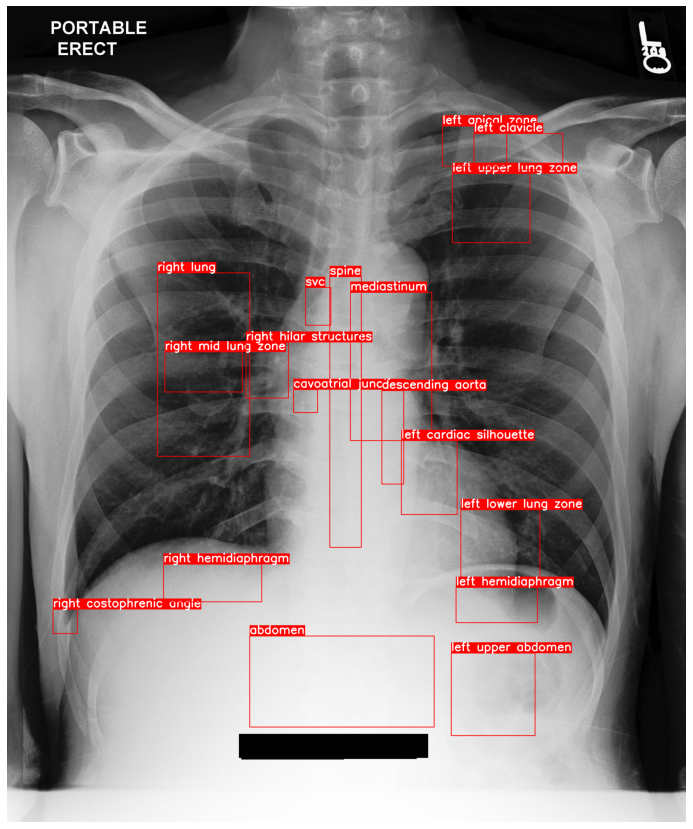

In [81]:
visualize(image, bboxes_2, category_ids_2, category_id_to_name, figsize=(15, 15))

In [160]:
# image2 = A.resize(image, 224, 224, )
image2 = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)

In [162]:
image2.shape

(224, 224, 3)

In [82]:
# image = cv2.imread(image_path)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

transform = A.Compose(
    [
        
#         A.RandomResizedCrop(height, width, scale=(0.1, 0.1), always_apply=True),
#         A.ShiftScaleRotate(p=1, shift_limit=0.1, rotate_limit=20, border_mode=cv2.BORDER_CONSTANT),
        A.ShiftScaleRotate(p=1, shift_limit=0, rotate_limit=0, scale_limit=(-0.5, -0.2), border_mode=cv2.BORDER_CONSTANT),
#         A.ColorJitter(brightness=(1.1,1.9), always_apply=True),
#         A.GaussNoise(always_apply=True, var_limit=(300, 400)),
#         A.RandomBrightnessContrast(always_apply=True)
    ],
    bbox_params=A.BboxParams(format='albumentations'),
    additional_targets={'bboxes2': 'bboxes'}
)

In [337]:
transformed['image'].shape

(3056, 2544, 3)

In [87]:
transformed = transform(image=image, bboxes=bboxes, bboxes2=bboxes_2)
print(len(transformed['bboxes']))
print(len(transformed['bboxes2']))
visualize(
    transformed['image'],
#     transformed['bboxes'],
    transformed['bboxes2'],
#     transformed['category_ids'],
    [x[-1] for x in transformed['bboxes2']],
    category_id_to_name,
)

TypeError: object of type 'NoneType' has no len()

In [70]:
transformed['bboxes2']

[[0.22156708935896555,
  0.327116052309672,
  0.3574423392613729,
  0.551810642083486],
 [0.23231132328510284,
  0.42408376932144165,
  0.3466981053352356,
  0.4731675386428833],
 [0.35193921128908795,
  0.41208551327387494,
  0.4145702322324117,
  0.48058464129765827],
 [0.06761006514231363,
  0.7395287950833639,
  0.10338050623734793,
  0.7693062822024027],
 [0.23047695060571036,
  0.6842277447382609,
  0.37526206175486243,
  0.7303664882977804],
 [0.6557914018630981,
  0.20527923107147217,
  0.7703092098236084,
  0.2901396155357361],
 [0.668501059214274,
  0.617364744345347,
  0.7847222288449606,
  0.7082242568333944],
 [0.6415094137191772,
  0.14725130796432495,
  0.7362421154975891,
  0.1963350772857666],
 [0.6611635287602743,
  0.7126963337262472,
  0.7810534636179606,
  0.7558900515238444],
 [0.47536687056223553,
  0.33180628220240277,
  0.5218815406163534,
  0.6636125644048054],
 [0.6878930727640787,
  0.15619546175003052,
  0.8183962305386862,
  0.20080715417861938],
 [0.50576

In [1]:
from importlib import reload
import medvqa

In [4]:
reload(medvqa.datasets.augmentation)

<module 'medvqa.datasets.augmentation' from '/home/pamessina/medvqa/medvqa/datasets/augmentation.py'>

In [3]:
from medvqa.datasets.augmentation import ImageBboxAugmentationTransforms

In [5]:
tmp = ImageBboxAugmentationTransforms((3056, 2544))

In [6]:
tfs = tmp.get_merged_spatial_color_transforms_list()

In [7]:
tfs_color = tmp.get_color_transforms_list()

In [8]:
tfs_spatial = tmp.get_spatial_transforms_list()

In [51]:
len(tfs_color)

2

In [22]:
len(tfs_spatial)

5

In [60]:
aug = tfs_color[1](image=image, bboxes=bboxes, category_ids=category_ids)
# aug = tfs_color[0](image=image, bboxes=bboxes, category_ids=category_ids)
# aug = tfs_spatial[1](image=image, bboxes=bboxes, category_ids=category_ids)

36
(3056, 2544, 3)
(3056, 2544, 3)
(3056, 2544, 3)


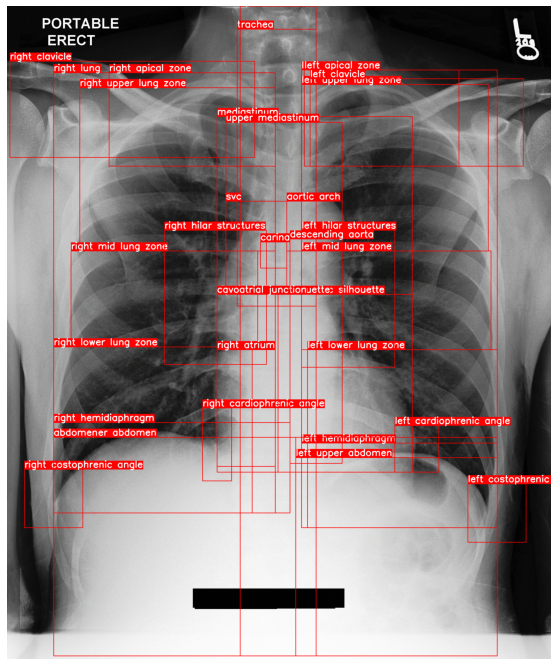

In [61]:
print(len(aug['bboxes']))
print(aug['image'].shape)
visualize(
    aug['image'],
    aug['bboxes'],
    aug['category_ids'],
    category_id_to_name,
    thickness=2,
    text_thickness=3,
)

In [36]:
from medvqa.evaluation.plots import visualize_image_and_polygons
from medvqa.datasets.chexlocalize import extract_images_segmentation_masks_and_binary_labels
import cv2

In [37]:
# Assuming mask is your 2D numpy array of type np.uint8
mask = np.array([[0, 1], [1, 0]], dtype=np.uint8)  # Example mask

# New dimensions
H, W = 100, 100

# Resize the mask
resized_mask = cv2.resize(mask, (W, H), interpolation=cv2.INTER_NEAREST)

In [38]:
resized_mask

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=uint8)

In [328]:
image_paths, masks, labels, polygons, polygon_names = extract_images_segmentation_masks_and_binary_labels(26, 26, return_polygons=True)

Without masks: 216/902


In [14]:
import numpy as np

In [32]:
idxs = np.where(1-labels.flatten())[0]

In [33]:
idxs.shape

(6843,)

In [27]:
masks_ = masks.reshape(-1, 169)

In [28]:
masks_.shape

(9020, 169)

In [35]:
masks_[idxs].sum(-1).max()

0.0

In [13]:
labels[i]

array([1., 1., 0., 1., 0., 0., 0., 0., 0., 0.])

/mnt/workspace/CheXlocalize/CheXpert_512x512/val/patient64541/study1/view1_frontal.jpg


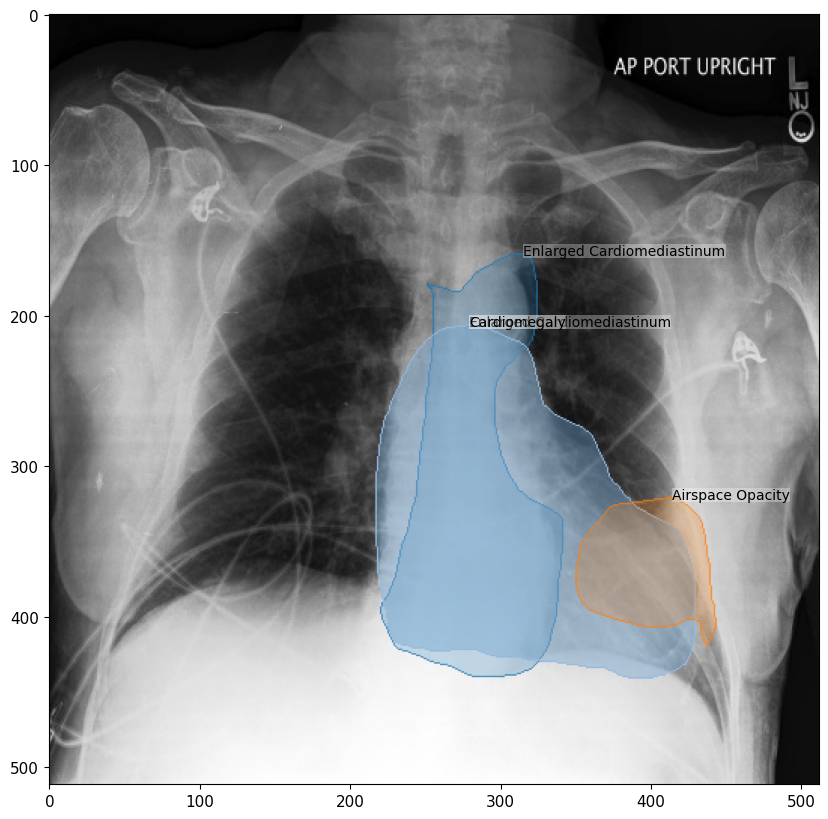

In [236]:
i = 0
print(image_paths[i])
visualize_image_and_polygons(
    image_path=image_paths[i],
    polygons_list=polygons[i],
    polygon_names=polygon_names[i],
    figsize=(10, 10),
    as_segmentation=True,
#     mask_resolution=(100, 100),
)

In [84]:
import albumentations as A
import cv2

transform = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(
        shift_limit=0,
        scale_limit=0,
        rotate_limit=15,
        border_mode=cv2.BORDER_CONSTANT,
        always_apply=True,
    ),
    A.RandomBrightnessContrast(p=0.2),
])

In [330]:
i = 0
image = cv2.imread(image_paths[i])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [331]:
masks_ = masks[i, np.where(labels[i])[0]]
masks_.shape

(3, 26, 26)

In [332]:
masks_list = [cv2.resize(mask, image.shape[:-1], interpolation=cv2.INTER_NEAREST) for mask in masks_]

In [333]:
masks_list[0].shape

(512, 512)

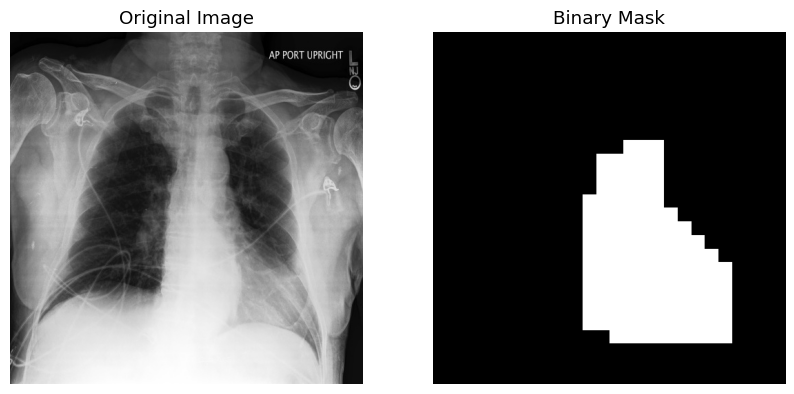

In [334]:
import matplotlib.pyplot as plt

# Plot the image and the mask
plt.figure(figsize=(10, 5))

# Plot the image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Plot the binary mask
plt.subplot(1, 2, 2)
plt.imshow(masks_list[0], cmap='gray')
plt.title('Binary Mask')
plt.axis('off')

plt.show()

In [335]:
def plot_image_with_mask(image, mask, title, alpha=0.5, figsize=(6, 6)):
    # Plot the image
    plt.figure(figsize=figsize)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

    # Overlay the binary mask
    plt.imshow(mask, cmap='jet', alpha=alpha)
    
    plt.show()

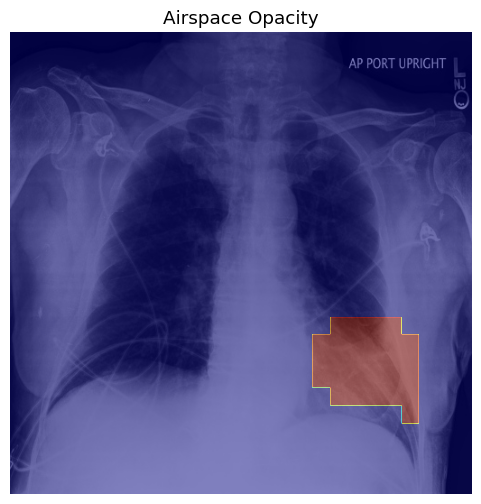

In [336]:
k = 2
plot_image_with_mask(image, masks_list[k], polygon_names[i][k])

In [109]:
transformed = transform(image=image, masks=masks_list)
transformed_image = transformed['image']
transformed_masks = transformed['masks']

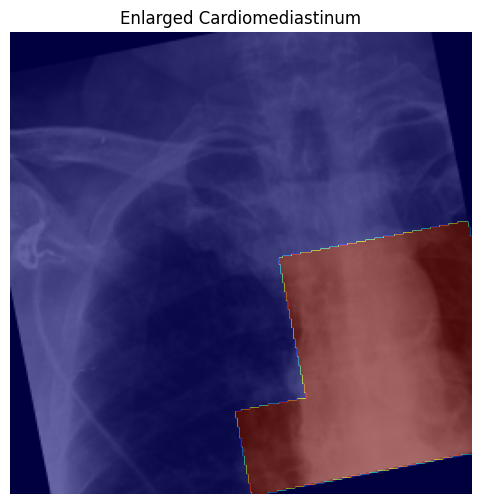

In [112]:
plot_image_with_mask(transformed_image, transformed_masks[k], polygon_names[i][k])

In [113]:
transformed_mask_ = cv2.resize(transformed_masks[k], (13, 13), interpolation=cv2.INTER_NEAREST)
transformed_mask_ = cv2.resize(transformed_mask_, transformed_image.shape[:-1], interpolation=cv2.INTER_NEAREST)

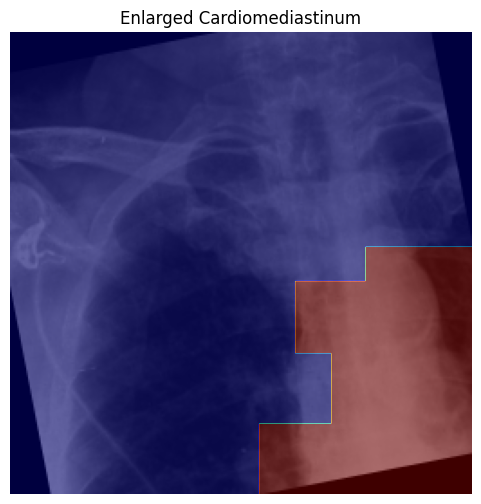

In [114]:
plot_image_with_mask(transformed_image, transformed_mask_, polygon_names[i][k])

In [171]:
from importlib import reload
import medvqa

In [408]:
reload(medvqa.datasets.image_processing)

<module 'medvqa.datasets.image_processing' from '/home/pamessina/medvqa/medvqa/datasets/image_processing.py'>

In [409]:
from medvqa.datasets.image_processing import get_image_transform

In [371]:
custom_transform = get_image_transform(
    image_size=(416,416),
    mask_height=26,
    mask_width=26,
    augmentation_mode='random-color-and-spatial',
    default_prob=0.1,
    use_segmentation_mask_aware_transform=True,
)

get_image_transform()
  Using segmentation mask aware transforms
    len(_augmented_mask_transforms) = 10
    augmentation_mode = random-color-and-spatial
    default_prob = 0.1
    Returning augmented transforms with mode random-color-and-spatial


In [354]:
i = 2
image_, masks_, labels_ = custom_transform(image_paths[i], masks[i].reshape(10,-1), labels[i])
denorm_image_ = denormalize(image_)

_transform()


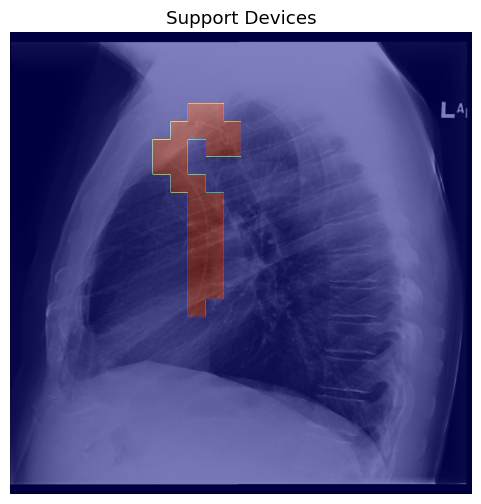

In [353]:
i = 2
k = 0
image = cv2.imread(image_paths[i])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_masks = masks[i, np.where(labels[i])[0]]
masks_list = [cv2.resize(mask, image.shape[:-1], interpolation=cv2.INTER_NEAREST) for mask in image_masks]
plot_image_with_mask(image, masks_list[k], polygon_names[i][k])

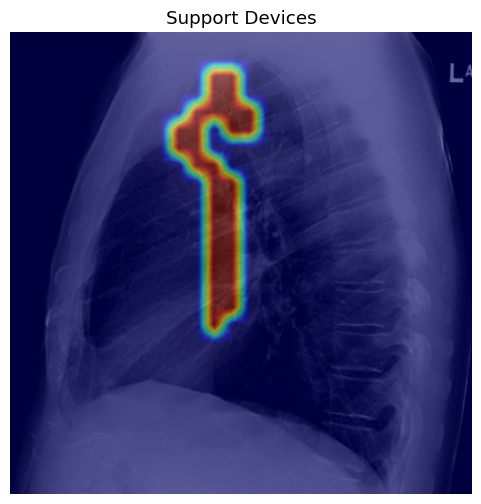

In [355]:
k = 0
pos_idxs = np.where(labels[i])[0]
idx = pos_idxs[k]
plot_image_with_mask(denorm_image_.permute(1, 2, 0).numpy(), cv2.resize(masks_[idx].reshape(26,26), (416, 416)), polygon_names[i][k])

In [180]:
image_.shape

torch.Size([3, 416, 416])

In [124]:
class DeNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        """
        Args:
            tensor (Tensor): Tensor image of size (C, H, W) to be denormalized.
        Returns:
            Tensor: Denormalized image.
        """
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
        return tensor

In [125]:
denormalize = DeNormalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))

In [181]:
denorm_image_ = denormalize(image_)

In [182]:
denorm_image_

tensor([[[0.0275, 0.0275, 0.0275,  ..., 0.0431, 0.0431, 0.0431],
         [0.0275, 0.0275, 0.0275,  ..., 0.0431, 0.0431, 0.0431],
         [0.0275, 0.0275, 0.0275,  ..., 0.0431, 0.0431, 0.0431],
         ...,
         [0.2588, 0.3333, 0.4078,  ..., 0.0549, 0.0549, 0.0549],
         [0.2706, 0.3490, 0.4353,  ..., 0.0549, 0.0549, 0.0549],
         [0.2941, 0.3529, 0.4627,  ..., 0.0549, 0.0549, 0.0549]],

        [[0.0275, 0.0275, 0.0275,  ..., 0.0431, 0.0431, 0.0431],
         [0.0275, 0.0275, 0.0275,  ..., 0.0431, 0.0431, 0.0431],
         [0.0275, 0.0275, 0.0275,  ..., 0.0431, 0.0431, 0.0431],
         ...,
         [0.2588, 0.3333, 0.4078,  ..., 0.0549, 0.0549, 0.0549],
         [0.2706, 0.3490, 0.4353,  ..., 0.0549, 0.0549, 0.0549],
         [0.2941, 0.3529, 0.4627,  ..., 0.0549, 0.0549, 0.0549]],

        [[0.0275, 0.0275, 0.0275,  ..., 0.0431, 0.0431, 0.0431],
         [0.0275, 0.0275, 0.0275,  ..., 0.0431, 0.0431, 0.0431],
         [0.0275, 0.0275, 0.0275,  ..., 0.0431, 0.0431, 0.

In [158]:
%matplotlib inline

In [185]:
masks_[idx].shape

(169,)

In [410]:
custom_transform = get_image_transform(
    image_size=(416,416),
    mask_height=13,
    mask_width=13,
    augmentation_mode='random-color-and-spatial',
    default_prob=0.5,
    use_segmentation_mask_aware_transform=True,
)

get_image_transform()
  Using segmentation mask aware transforms
    len(_augmented_mask_transforms) = 10
    augmentation_mode = random-color-and-spatial
    default_prob = 0.5
    Returning augmented transforms with mode random-color-and-spatial


In [356]:
from medvqa.datasets.mimiccxr import get_mimiccxr_medium_image_path, get_imageId2PartPatientStudy
from medvqa.datasets.ms_cxr import get_ms_cxr_dicom_id_2_phrases_and_masks

In [357]:
dicom_id_2_phrases_and_masks = get_ms_cxr_dicom_id_2_phrases_and_masks(13, 13)

In [360]:
dicom_ids = list(dicom_id_2_phrases_and_masks.keys())

In [362]:
dicom_id_2_phrases_and_masks[dicom_ids[0]][1][0].shape

(169,)

In [364]:
imageId2PartPatientStudy = get_imageId2PartPatientStudy()

In [478]:
i = -1
did = dicom_ids[i]
phrases, masks = dicom_id_2_phrases_and_masks[did]
masks = np.array(masks)
image_path = get_mimiccxr_medium_image_path(*imageId2PartPatientStudy[did], did)
image_path, phrases

('/mnt/workspace/mimic-cxr-jpg/images-medium(512)/p13/p13859188/s52811469/0677ec27-61328435-0dfee3b9-356bfc03-8cbd3353.jpg',
 ['Small bilateral pleural effusions are presumed'])

In [395]:
def aux(x, *args):
    if args:
        return x, *args
    return x

In [397]:
aux(4)

4

In [490]:
image_, masks_ = custom_transform(image_path, masks.reshape(-1,  169))
denorm_image_ = denormalize(image_)

_transform()


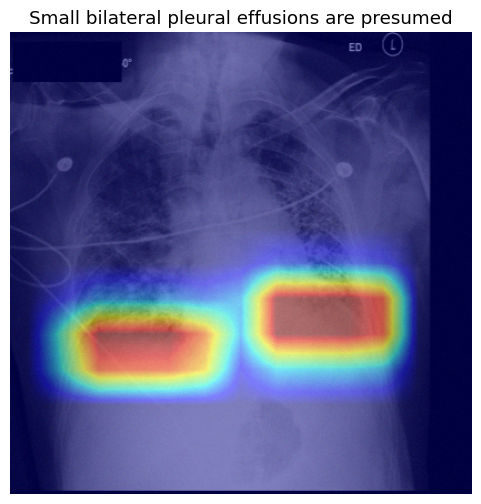

In [491]:
k = 0
plot_image_with_mask(denorm_image_.permute(1, 2, 0).numpy(), cv2.resize(masks_[k].reshape(13,13), (416, 416)), phrases[k])

In [508]:
from medvqa.datasets.vinbig import (
    compute_masks_and_binary_labels_from_bounding_boxes,
    load_train_image_id_2_bboxes,
    get_medium_size_image_path,
    VINBIG_BBOX_NAMES
)

In [495]:
vinbig_image_id_2_bboxes = load_train_image_id_2_bboxes(True, True)

Anomalous bboxes found: 29 of 37367
class_id_offset: 0


In [496]:
image_ids = list(vinbig_image_id_2_bboxes.keys())

In [547]:
custom_transform = get_image_transform(
    image_size=(416,416),
    mask_height=13,
    mask_width=13,
    augmentation_mode='random-color-and-spatial',
    default_prob=0.5,
    use_segmentation_mask_aware_transform=True,
)

get_image_transform()
  Using segmentation mask aware transforms
    len(_augmented_mask_transforms) = 10
    augmentation_mode = random-color-and-spatial
    default_prob = 0.5
    Returning augmented transforms with mode random-color-and-spatial


In [548]:
i = 1
image_path = get_medium_size_image_path(image_ids[i])
bboxes = vinbig_image_id_2_bboxes[image_ids[i]]
masks_, labels_ = compute_masks_and_binary_labels_from_bounding_boxes(
    mask_height=13, mask_width=13, bbox_coords=bboxes[0], bbox_classes=bboxes[1],
)
image_path

'/mnt/workspace/vinbig-cxr/dataset-jpg/images-512x512(keep_aspect_ratio)/0007d316f756b3fa0baea2ff514ce945.jpg'

In [562]:
transf_image_, transf_masks_ = custom_transform(image_path, masks_.reshape(-1,  169))
denorm_image_ = denormalize(transf_image_)

_transform()


In [550]:
labels_, np.where(labels_)

(array([          1,           0,           0,           1,           0,           0,           0,           0,           0,           1,           0,           0,           0,           0,           0,           0,           0,           0,           1,           0,           1,           0], dtype=float32),
 (array([ 0,  3,  9, 18, 20]),))

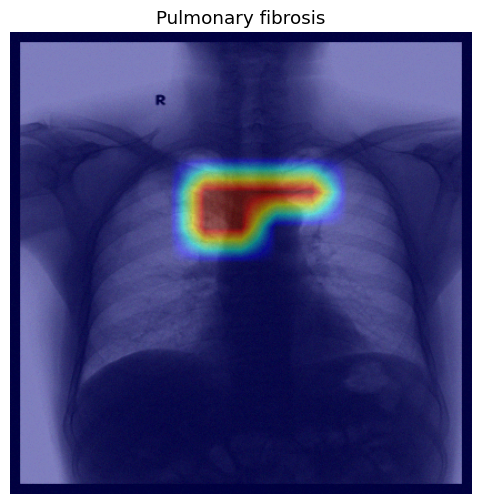

In [563]:
k = 20
plot_image_with_mask(denorm_image_.permute(1, 2, 0).numpy(), cv2.resize(transf_masks_[k].reshape(13,13), (416, 416)), VINBIG_BBOX_NAMES[k])